# DISCOVER-AQ Maryland (2011)

<img src="disco/flighttrack.png">
Source: NASA LaRC (2017)

In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings('ignore')
%pylab inline

matplotlib.rcParams.update({'font.size': 16})

Populating the interactive namespace from numpy and matplotlib


##### Open pickles

In [83]:
no_anth = pickle.load(open('disco/no_anth.pkl', 'rb'))
no_fire = pickle.load(open('disco/no_fire.pkl', 'rb'))
no_fert = pickle.load(open('disco/no_fert.pkl', 'rb'))
no_ltng = pickle.load(open('disco/no_ltng.pkl', 'rb'))
no_soil = pickle.load(open('disco/no_soil.pkl', 'rb'))
no_biog = pickle.load(open('disco/no_biog.pkl', 'rb'))
base = pickle.load(open('disco/base.pkl', 'rb'))
dsc_obm = pickle.load(open('disco/obs.pkl', 'rb'))

# ***SKIP THIS PART IF USING PICKLES***

### Retrieve GEOS-Chem data along flighttracks

GC output: Tracers past 67 are not assigned.

In [77]:
def retr_disco(folder):
    plog = 'Planeflight.log.'
    if folder=='base':
        dat = pd.read_csv('../../planeflights/' + plog + str(dates[0]), sep='\s*', engine='python')
    else:
        dat = pd.read_csv('../../planeflights/' + folder + '/' + plog + str(dates[0]), sep='\s*', engine='python')
    dsc_mon = dat[dat["TYPE"]=='DISCO']

    for dt in dates:
        day_dat = 0
        dsc_day = 0
        if folder=='base':
            day_dat = pd.read_csv('../../planeflights/' + plog + str(dt), sep='\s*', engine='python')
        else:
            day_dat = pd.read_csv('../../planeflights/' + folder + '/' + plog + str(dt), sep='\s*', engine='python')
        dsc_day = day_dat[day_dat["TYPE"]=="DISCO"]
        dsc_mon = pd.concat([dsc_mon, dsc_day])

    dsc_mon['NOx'] = dsc_mon['TRA_001'] + dsc_mon['TRA_064'] # NOx
    return dsc_mon;

In [78]:
dates = np.arange(20110701, 20110730)

In [ ]:
no_anth = retr_disco('no_anthro')
no_fire = retr_disco('no_bmb')
no_fert = retr_disco('no_fertNOx')
no_ltng = retr_disco('no_lightningNOx')
no_soil = retr_disco('no_soilNOx')
no_biog = retr_disco('no_bio')
base = retr_disco('base')

no_anth.to_pickle('disco/no_anth.pkl')
no_fire.to_pickle('disco/no_fire.pkl')
no_fert.to_pickle('disco/no_fert.pkl')
no_ltng.to_pickle('disco/no_ltng.pkl')
no_soil.to_pickle('disco/no_soil.pkl')
no_biog.to_pickle('disco/no_biog.pkl')
base.to_pickle('disco/base.pkl')

list(dsc_mon)

## Retrieve aircraft observations

In [49]:
pdat = 'Planeflight.dat.'
odat = pd.read_csv('../../flighttracks/2011/07/' + pdat + str(dates[0]) + '.csv', sep=',', engine='python')
dsc_obm = odat[odat['campaign']=='DISCOVER-AQ-DC-WP3B']

for dt in dates:
    day_dat = 0
    dsc_day = 0
    day_dat = pd.read_csv('../../flighttracks/2011/07/' + pdat + str(dt) + '.csv', sep=',', engine='python')
    dsc_obd = day_dat[day_dat['campaign']=='DISCOVER-AQ-DC-WP3B']
    dsc_obm = pd.concat([dsc_obm, dsc_obd])

dsc_obm['ANs_TD.LIF'] = dsc_obm['ANs_TD.LIF']/1e12 # convert from ppt to MR

In [62]:
dsc_obm['VPD'] = dsc_obm['C_SatVaporPresWater'] - dsc_obm['C_VaporPresWater']
dsc_obm['NOx'] = dsc_obm['NO'] + dsc_obm['NO2_NCAR']
dsc_obm['NOx_NOy'] = dsc_obm['NOx']/dsc_obm['NOy']
dsc_obm['O3_CO'] = dsc_obm['O3']/dsc_obm['CO']
dsc_obm = grp_pres(dsc_obm, 'press')
dsc_obm.to_pickle('disco/obs.pkl')
list(dsc_obm)

['ABSdry532',
 'ACLD_GIN',
 'ACLF_GIN',
 'ACLS_GIN',
 'ADC_IAS',
 'AKRD',
 'ALT_GIN',
 'ANs_TD.LIF',
 'AOA',
 'AOSS',
 'APO.X',
 'APO_AO2',
 'ATX',
 'A_CabinPressure',
 'A_DewPoint',
 'A_JNO2_Nadir',
 'A_JNO2_Zenith',
 'A_RadarAlt',
 'A_SurfTemp',
 'A_TotalTemp',
 'Abs470tot',
 'Abs532tot',
 'Abs660tot',
 'Acetaldehyde',
 'Acetic_acid',
 'Acetone',
 'Acetonitrile',
 'Ammonium',
 'Angstrom_Exponent_of_Absorption_at_450and550nm',
 'Angstrom_Exponent_of_Absorption_at_450and700nm',
 'Angstrom_Exponent_of_Scattering_at_450and550nm',
 'Angstrom_Exponent_of_Scattering_at_450and700nm',
 'BC_ng_kg',
 'BC_ng_m3',
 'BSC_BLUU',
 'BSC_GRNU',
 'BSC_REDU',
 'BTHEIM_C',
 'BTHEIM_U',
 'Bap370',
 'Bap470',
 'Bap520',
 'Bap590',
 'Bap660',
 'Bap880',
 'Bap950',
 'Baro_Altitude',
 'Bkscat450',
 'Bkscat550',
 'Bkscat700',
 'BlackCarbonMassConcentration',
 'Bscat450',
 'Bscat550',
 'Bscat700',
 'CAB_PRES',
 'CAB_TEMP',
 'CFC_113_P',
 'CFC_113e_P',
 'CFC_11_P',
 'CFC_11e_P',
 'CFC_12_P',
 'CFC_12e_P',
 'CH2O

# ***IF USING PICKLES BEGIN AGAIN HERE***

### Compare model and aircraft observations

#### Organize data for simplified vertical profiles

In [34]:
def grp_pres(df, pvar):
    df['pint'] = np.zeros(len(df))
    df['pint'][:] = np.round(df[pvar][:], -2)
    return df;

In [35]:
def sens(df):
    new_df = df
    sens_hcho = base['TRA_020'] - df['TRA_020']
    sens_no2 = base['TRA_064'] - df['TRA_064']
    new_df['HCHO'] = sens_hcho
    new_df['NO2'] = sens_no2
    return new_df;

In [220]:
def mod_filt(df): # don't use this...
    df['O3_CO'] = df['TRA_002'] / df['TRA_004'] # O3/CO ratio
    df['NOx_NOy'] = df['NOx'] / (df['NOx'] + df['TRA_003'] + df['TRA_007'] + df['TRA_022']) # (NOx/NOy: NOy=(NOx+PAN+HNO3+N2O5))
    df_s = df.loc[(df['O3_CO']<=1.25) & (df['NOx_NOy']<0.4)]
    return df_s;

In [84]:
anth = sens(grp_pres(no_anth, 'PRESS'))
biog = sens(grp_pres(no_biog, 'PRESS'))
fert = sens(grp_pres(no_fert, 'PRESS'))
fire = sens(grp_pres(no_fire, 'PRESS'))
ltng = sens(grp_pres(no_ltng, 'PRESS'))
soil = sens(grp_pres(no_soil, 'PRESS'))
base = grp_pres(base, 'PRESS')

In [65]:
obs = dsc_obm.loc[(dsc_obm['NOx_NOy']<0.4) & (dsc_obm['O3_CO']<=1.25)
                        & (dsc_obm['Acetonitrile']<0.225)]
obs['CH2O'] = obs['CH2O']*1e9
obs['NO2_NCAR'] = obs['NO2_NCAR']*1e9

In [85]:
base['HCHO'] = base['TRA_020']
base['NO2'] = base['TRA_064']

anth['HCHO'] = anth['HCHO']*1e9
biog['HCHO'] = biog['HCHO']*1e9
fert['HCHO'] = fert['HCHO']*1e9
fire['HCHO'] = fire['HCHO']*1e9
ltng['HCHO'] = ltng['HCHO']*1e9
soil['HCHO'] = soil['HCHO']*1e9
base['HCHO'] = base['HCHO']*1e9

anth['NO2'] = anth['NO2']*1e9
biog['NO2'] = biog['NO2']*1e9
fert['NO2'] = fert['NO2']*1e9
fire['NO2'] = fire['NO2']*1e9
ltng['NO2'] = ltng['NO2']*1e9
soil['NO2'] = soil['NO2']*1e9
base['NO2'] = base['NO2']*1e9

# Nitrogen Dioxide

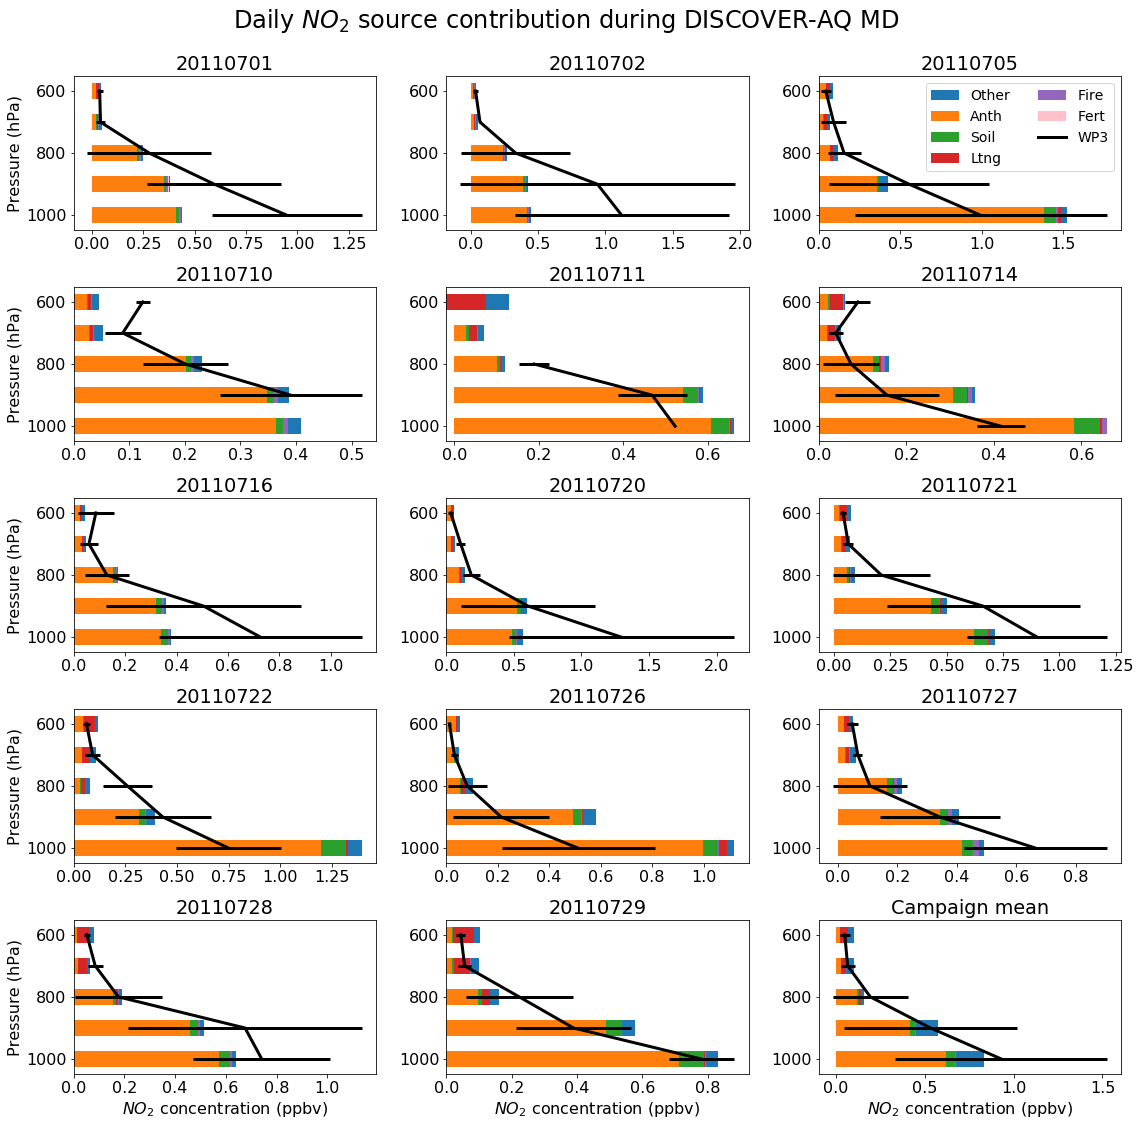

In [113]:
fltdt = sort(list(set(base['YYYYMMDD'])))
fltdt = np.delete(fltdt, [3,8,12]) #07/07, 07/18, 07/23 not in obs...

fig = plt.figure(figsize=[16,16])
for idx, dt in list(enumerate(fltdt)):
    fig.add_subplot(5,3,1 + idx)
    
    bsdt = base.loc[base['YYYYMMDD']==dt]
    andt = anth.loc[anth['YYYYMMDD']==dt]
    sldt = soil.loc[soil['YYYYMMDD']==dt]
    fidt = fire.loc[fire['YYYYMMDD']==dt]
    ltdt = ltng.loc[ltng['YYYYMMDD']==dt]
    ftdt = fert.loc[fert['YYYYMMDD']==dt]
    
    xvals = [andt.groupby('pint').mean()['NO2'], sldt.groupby('pint').mean()['NO2'],
             ltdt.groupby('pint').mean()['NO2'], fidt.groupby('pint').mean()['NO2'], 
             ftdt.groupby('pint').mean()['NO2']]
    
    plt.barh(sort(list(set(bsdt['pint']))), bsdt.groupby('pint').mean()['NO2'], height=50, label='Other')
    plt.barh(sort(list(set(andt['pint']))), xvals[0], height=50, left=0, label='Anth')
    plt.barh(sort(list(set(sldt['pint']))), xvals[1], height=50, left=xvals[0], label='Soil')
    plt.barh(sort(list(set(ltdt['pint']))), xvals[2], height=50, left=xvals[0] + xvals[1], label='Ltng')
    plt.barh(sort(list(set(fidt['pint']))), xvals[3], height=50, left=xvals[0] + xvals[1] + xvals[2], label='Fire')
    plt.barh(sort(list(set(ftdt['pint']))), xvals[4], height=50, left=xvals[0] + xvals[1] + xvals[2] + xvals[3], label='Fert', color='pink')

    odf = obs.loc[obs['day']==int(str(dt)[-2:])]
    plt.errorbar(odf.groupby('pint').mean()['NO2_NCAR'], sort(list(set(odf['pint']))), xerr=odf.groupby('pint').std()['NO2_NCAR'], c='k', linewidth=3, label='WP3')
    plt.gca().invert_yaxis()
    plt.title(dt)
    if dt==20110705:
        plt.legend(loc='best', ncol=2, fontsize=14)
    if idx >11:
        plt.xlabel(r'$NO_2$' + ' concentration (ppbv)')
    if idx % 3==0:
        plt.ylabel('Pressure (hPa)')

fig.add_subplot(5,3,15)
xvals = [anth.groupby('pint').mean()['NO2'], soil.groupby('pint').mean()['NO2'],
         ltng.groupby('pint').mean()['NO2'], fire.groupby('pint').mean()['NO2'], 
         fert.groupby('pint').mean()['NO2']]
    
plt.barh(sort(list(set(bsdt['pint']))), bsdt.groupby('pint').mean()['NO2'], height=50, label='Other')
plt.barh(sort(list(set(anth['pint']))), xvals[0], height=50, left=0, label='Anth')
plt.barh(sort(list(set(soil['pint']))), xvals[1], height=50, left=xvals[0], label='Soil')
plt.barh(sort(list(set(ltng['pint']))), xvals[2], height=50, left=xvals[0] + xvals[1], label='Ltng')
plt.barh(sort(list(set(fire['pint']))), xvals[3], height=50, left=xvals[0] + xvals[1] + xvals[2], label='Fire')
plt.barh(sort(list(set(fert['pint']))), xvals[4], height=50, left=xvals[0] + xvals[1] + xvals[2] + xvals[3], label='Fert', color='pink')

plt.errorbar(obs.groupby('pint').mean()['NO2_NCAR'], sort(list(set(obs['pint']))), xerr=obs.groupby('pint').std()['NO2_NCAR'], c='k', linewidth=3, label='WP3')
plt.gca().invert_yaxis()
plt.title('Campaign mean')
plt.xlabel(r'$NO_2$' + ' concentration (ppbv)')

plt.suptitle('Daily ' + r'$NO_2$' + ' source contribution during DISCOVER-AQ MD', fontsize=24)
plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.savefig('disco_no2_contr.jpg')

# Formaldehyde (note colors are different)

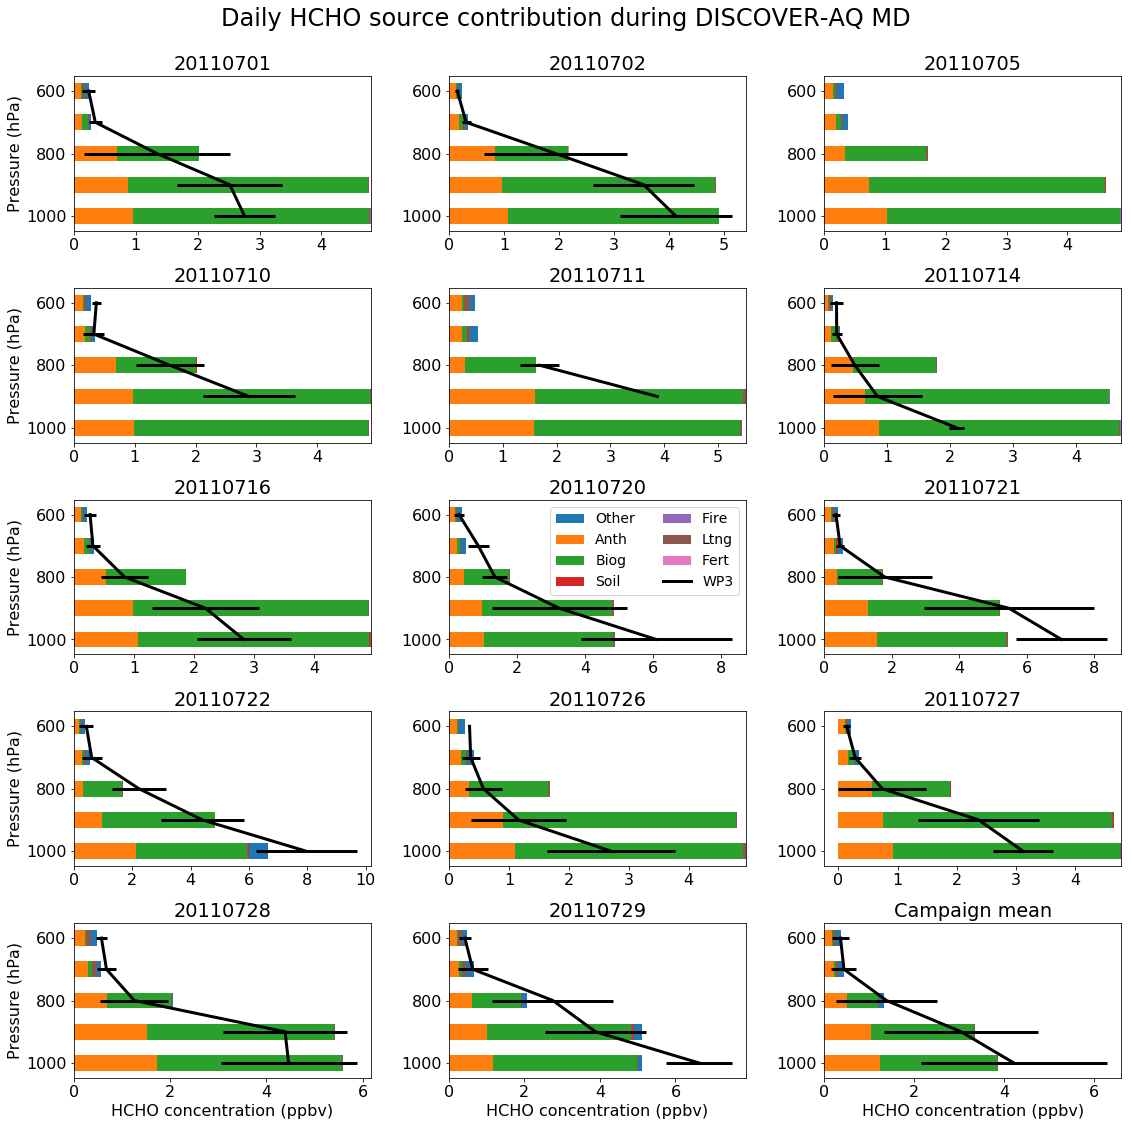

In [114]:
fig = plt.figure(figsize=[16,16])
for idx, dt in list(enumerate(fltdt)):
    fig.add_subplot(5,3,1 + idx)
    bsdt = base.loc[base['YYYYMMDD']==dt]
    andt = anth.loc[anth['YYYYMMDD']==dt]
    sldt = soil.loc[soil['YYYYMMDD']==dt]
    fidt = fire.loc[fire['YYYYMMDD']==dt]
    ltdt = ltng.loc[ltng['YYYYMMDD']==dt]
    ftdt = fert.loc[fert['YYYYMMDD']==dt]
    
    xvals = [andt.groupby('pint').mean()['HCHO'], bgdt.groupby('pint').mean()['HCHO'],
             sldt.groupby('pint').mean()['HCHO'], fidt.groupby('pint').mean()['HCHO'],
             ltdt.groupby('pint').mean()['HCHO']]
    
    plt.barh(sort(list(set(bsdt['pint']))), bsdt.groupby('pint').mean()['HCHO'], height=50, label='Other')
    plt.barh(sort(list(set(andt['pint']))), xvals[0], height=50, label='Anth')
    plt.barh(sort(list(set(biog['pint']))), xvals[1], height=50, left=xvals[0], label='Biog')
    plt.barh(sort(list(set(sldt['pint']))), xvals[2], height=50, left=xvals[0] + xvals[1], label='Soil')
    plt.barh(sort(list(set(fidt['pint']))), xvals[3], height=50, left=xvals[0] + xvals[1] + xvals[2], label='Fire')
    plt.barh(sort(list(set(ltdt['pint']))), xvals[4], height=50, left=xvals[0] + xvals[1] + xvals[2] + xvals[3], label='Ltng')
    plt.barh(sort(list(set(ftdt['pint']))), ftdt.groupby('pint').mean()['HCHO'], height=50, left=xvals[0] + xvals[1] + xvals[2] + xvals[3] + xvals[4], label='Fert')

    odf = obs.loc[obs['day']==int(str(dt)[-2:])]
    odf = odf[odf['CH2O']>0]
    plt.errorbar(odf.groupby('pint').mean()['CH2O'], sort(list(set(odf['pint']))), xerr=odf.groupby('pint').std()['CH2O'], c='k', linewidth=3, label='WP3')

    plt.gca().invert_yaxis()
    plt.title(dt)
    if dt==20110720:
        plt.legend(loc='best', ncol=2, fontsize=14)
    if idx >11:
        plt.xlabel('HCHO concentration (ppbv)')
    if idx % 3==0:
        plt.ylabel('Pressure (hPa)')

fig.add_subplot(5,3,15)
#xvals_all

xvals = [anth.groupby('pint').mean()['HCHO'], biog.groupby('pint').mean()['HCHO'],
         soil.groupby('pint').mean()['HCHO'], fire.groupby('pint').mean()['HCHO'],
         ltng.groupby('pint').mean()['HCHO']]

plt.barh(sort(list(set(base['pint']))), base.groupby('pint').mean()['HCHO'], height=50, label='Other')
plt.barh(sort(list(set(anth['pint']))), xvals[0], height=50, label='Anth')
plt.barh(sort(list(set(biog['pint']))), xvals[1], height=50, left=xvals[0], label='Biog')
plt.barh(sort(list(set(soil['pint']))), xvals[2], height=50, left=xvals[0]+xvals[1], label='Soil')
plt.barh(sort(list(set(fire['pint']))), xvals[3], height=50, left=xvals[0]+xvals[1]+xvals[2], label='Fire')
plt.barh(sort(list(set(ltng['pint']))), xvals[4], height=50, left=xvals[0]+xvals[1]+xvals[2]+xvals[3], label='Ltng')
plt.barh(sort(list(set(fert['pint']))), fert.groupby('pint').mean()['HCHO'], height=50, left=xvals[0]+xvals[1]+xvals[2]+xvals[3]+xvals[4], label='Fert')

obtp = obs[obs['CH2O']>0]
plt.errorbar(obtp.groupby('pint').mean()['CH2O'], sort(list(set(obtp['pint']))), xerr=obtp.groupby('pint').std()['CH2O'], c='k', linewidth=3, label='WP3')

plt.gca().invert_yaxis()
plt.title('Campaign mean')
plt.xlabel('HCHO concentration (ppbv)')

plt.suptitle('Daily HCHO source contribution during DISCOVER-AQ MD', fontsize=24)
plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.savefig('disco_hcho_contr.jpg')

Note that HCHO not measured on 07/05